In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import re
import warnings

In [114]:
warnings.filterwarnings('ignore')

# Firstview

In [115]:
df1 = pd.read_csv('/Users/rajathadri_as/Documents/FAD_adult_04-09-23.csv')

In [116]:
df1.head()

,id,main_id,item_type_id,guid,supertype_id,paa_step1,type_id,type_import,cat_id,type_name,...,performance,days_running,score,partnership_id,spidersnet,user_edited_on,createdby,createdon,editedby,editedon
0,13039849,0,0,NaN,0,type_id:8;cat_id:182,8,0,182,Adult,...,0,0,0,0,0,2022-12-05 11:53:35,import,2022-04-27 00:05:04,laurae,2023-05-03 09:40:43
1,13308960,0,0,NaN,0,type_id:8;cat_id:182,8,0,182,Adult,...,0,0,0,0,0,2022-12-05 11:53:35,import,2022-04-27 00:05:06,laurae,2023-05-03 09:40:43
2,13412875,0,0,NaN,0,type_id:8;cat_id:182,8,0,182,Adult,...,0,0,0,0,0,2022-12-05 11:53:35,import,2022-04-27 00:05:08,laurae,2023-05-03 09:40:43
3,13421081,0,0,NaN,0,type_id:8;cat_id:182,8,0,182,Adult,...,0,0,0,0,0,2022-12-05 11:46:24,import,2016-08-04 22:04:53,laurae,2023-05-03 09:40:43
4,13421082,0,0,NaN,0,type_id:8;cat_id:182,8,0,182,Adult,...,0,0,0,0,0,2022-12-05 11:46:24,import,2016-08-06 14:09:06,laurae,2023-05-03 09:40:43


In [117]:
df1.shape

(15783, 564)

In [118]:
df1.duplicated().value_counts()

False    15783
Name: count, dtype: int64

In [145]:
df_determiners = df1[['type_id','cat_id','active','ad_sold','suspended','approved','cost','region_id',
                      'county_id','user_active','top_ad','top_ad_active','highlighted','highlighted_active',
                      'boost','boost_active','video_active','umphotos_active','package_id','paying_trader',
                      'premium_ad','photo','num_photos','seller_type_id','map_on_ad','reply_me','price',
                      'video','emailable','enable_maps','photos_removed','views',
                      'business_url_click','contacts','displays','views_photo','url_click','print_click',
                      'print_phone','trade']]

In [146]:
df_determiners.head()

,type_id,cat_id,active,ad_sold,suspended,approved,cost,region_id,county_id,user_active,...,photos_removed,views,business_url_click,contacts,displays,views_photo,url_click,print_click,print_phone,trade
0,8,182,0,0,0,0,0,19,39,1,...,0,21,0,0,0,0,0,0,0,1
1,8,182,0,0,0,0,0,19,39,1,...,0,25,0,0,0,0,0,0,0,1
2,8,182,0,0,0,0,0,19,39,1,...,0,19,0,0,0,0,0,0,0,1
3,8,182,0,0,0,0,0,1,74,1,...,0,1,0,0,0,0,0,0,0,1
4,8,182,0,0,0,0,0,1,74,1,...,0,0,0,0,0,0,0,0,0,1


In [147]:
df_determiners.columns

Index(['type_id', 'cat_id', 'active', 'ad_sold', 'suspended', 'approved',
       'cost', 'region_id', 'county_id', 'user_active', 'top_ad',
       'top_ad_active', 'highlighted', 'highlighted_active', 'boost',
       'boost_active', 'video_active', 'umphotos_active', 'package_id',
       'paying_trader', 'premium_ad', 'photo', 'num_photos', 'seller_type_id',
       'map_on_ad', 'reply_me', 'price', 'video', 'emailable', 'enable_maps',
       'photos_removed', 'views', 'business_url_click', 'contacts', 'displays',
       'views_photo', 'url_click', 'print_click', 'print_phone', 'trade'],
      dtype='object')

In [148]:
df_determiners.describe().T

,count,mean,std,min,25%,50%,75%,max
type_id,15783.0,8.028132,0.165354,8.0,8.0,8.0,8.0,9.0
cat_id,15783.0,204.240955,45.311741,0.0,182.0,182.0,182.0,298.0
active,15783.0,0.868466,0.337994,0.0,1.0,1.0,1.0,1.0
ad_sold,15783.0,0.085408,0.279497,0.0,0.0,0.0,0.0,1.0
suspended,15783.0,0.003231,0.056755,0.0,0.0,0.0,0.0,1.0
approved,15783.0,0.834949,0.374805,0.0,1.0,1.0,1.0,2.0
cost,15783.0,44.560603,409.681055,0.0,0.0,0.0,0.0,8799.0
region_id,15783.0,4.204524,4.933314,0.0,1.0,3.0,6.0,19.0
county_id,15783.0,35.510423,36.722545,0.0,0.0,28.0,65.0,120.0
user_active,15783.0,0.940632,0.236319,0.0,1.0,1.0,1.0,1.0


In [149]:
df_determiners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15783 entries, 0 to 15782
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   type_id             15783 non-null  int64  
 1   cat_id              15783 non-null  int64  
 2   active              15783 non-null  int64  
 3   ad_sold             15783 non-null  int64  
 4   suspended           15783 non-null  int64  
 5   approved            15783 non-null  int64  
 6   cost                15783 non-null  int64  
 7   region_id           15783 non-null  int64  
 8   county_id           15783 non-null  int64  
 9   user_active         15783 non-null  int64  
 10  top_ad              15783 non-null  int64  
 11  top_ad_active       15783 non-null  int64  
 12  highlighted         15783 non-null  int64  
 13  highlighted_active  15783 non-null  int64  
 14  boost               15783 non-null  int64  
 15  boost_active        15783 non-null  int64  
 16  vide

# Wrangling

In [150]:
df_determiners.drop(columns={'highlighted','highlighted_active','price'}, inplace=True)

In [151]:
df_determiners.approved.value_counts()

approved
1    13136
0     2626
2       21
Name: count, dtype: int64

In [152]:
df_determiners = df_determiners[df_determiners['approved']==1]

In [153]:
df_determiners.suspended.value_counts()

suspended
0    13115
1       21
Name: count, dtype: int64

In [154]:
df_determiners = df_determiners[df_determiners['suspended']==0]

In [155]:
df_determiners.columns

Index(['type_id', 'cat_id', 'active', 'ad_sold', 'suspended', 'approved',
       'cost', 'region_id', 'county_id', 'user_active', 'top_ad',
       'top_ad_active', 'boost', 'boost_active', 'video_active',
       'umphotos_active', 'package_id', 'paying_trader', 'premium_ad', 'photo',
       'num_photos', 'seller_type_id', 'map_on_ad', 'reply_me', 'video',
       'emailable', 'enable_maps', 'photos_removed', 'views',
       'business_url_click', 'contacts', 'displays', 'views_photo',
       'url_click', 'print_click', 'print_phone', 'trade'],
      dtype='object')

In [156]:
df_determiners.describe().T

,count,mean,std,min,25%,50%,75%,max
type_id,13115.0,8.000076,0.008732,8.0,8.0,8.0,8.0,9.0
cat_id,13115.0,206.189249,46.910706,181.0,182.0,182.0,182.0,298.0
active,13115.0,0.996416,0.059759,0.0,1.0,1.0,1.0,1.0
ad_sold,13115.0,0.102631,0.303487,0.0,0.0,0.0,0.0,1.0
suspended,13115.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
approved,13115.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
cost,13115.0,51.770111,444.917225,0.0,0.0,0.0,0.0,8799.0
region_id,13115.0,3.853526,4.479186,0.0,0.0,3.0,6.0,19.0
county_id,13115.0,33.128860,37.544762,0.0,0.0,16.0,61.0,120.0
user_active,13115.0,0.928631,0.257449,0.0,1.0,1.0,1.0,1.0


In [157]:
df_determiners.drop(columns={'suspended','approved','video_active','reply_me','business_url_click','emailable'}, inplace=True)

# Analysis

In [158]:
df_corr = df_determiners

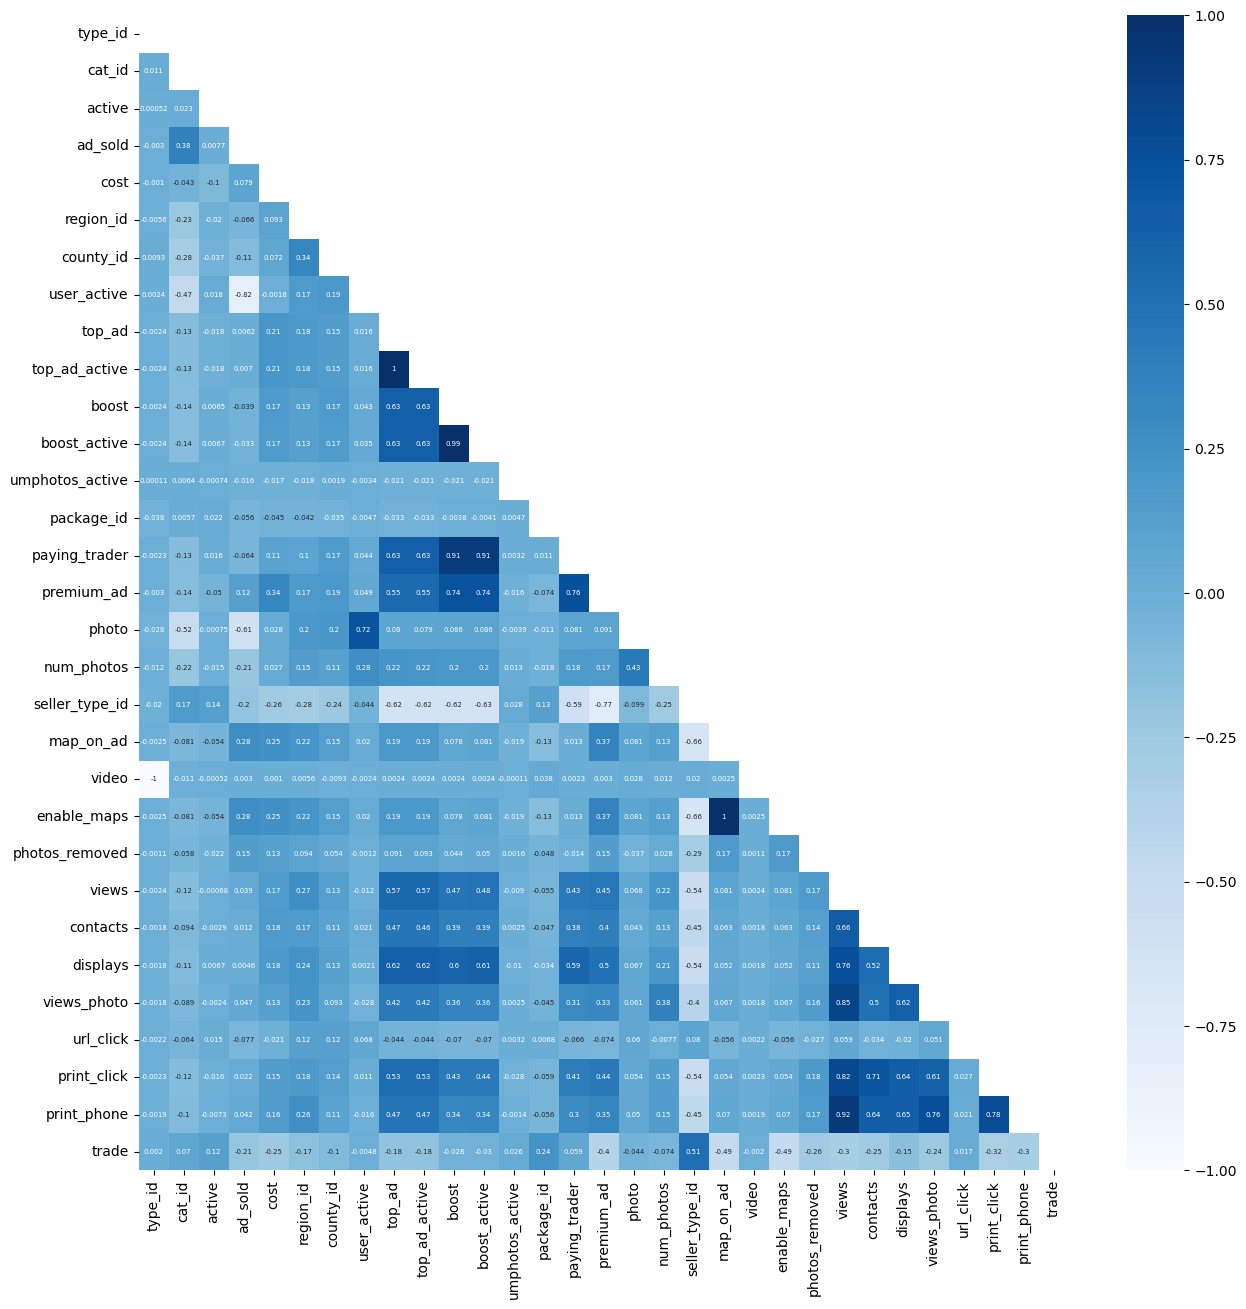

In [159]:
# Checking for multi-collinearity
correlation = df_corr.corr()
# creating mask
mask = np.triu(np.ones_like(correlation))

plt.figure(figsize=(15,15))
sns.heatmap(correlation, cmap='Blues', annot=True, annot_kws={'fontsize': 5}, mask=mask)
plt.show()

In [160]:
df_adult = df_determiners[df_determiners['type_id']==8]

In [161]:
df_adultbusiness = df_determiners[df_determiners['type_id']==9]

In [162]:
df_adult.shape

(13114, 31)

In [163]:
df_adultbusiness.shape

(1, 31)

In [164]:
df_adultbusiness

,type_id,cat_id,active,ad_sold,cost,region_id,county_id,user_active,top_ad,top_ad_active,...,enable_maps,photos_removed,views,contacts,displays,views_photo,url_click,print_click,print_phone,trade
15399,9,263,1,0,0,1,73,1,0,0,...,0,0,0,0,8295,0,0,0,0,1


In [166]:
df_adult['trade'].value_counts()

trade
1    12477
0      637
Name: count, dtype: int64

In [167]:
df_private = df_adult[df_adult['trade']==0]

In [168]:
df_business = df_adult[df_adult['trade']==1]

In [170]:
df_private.drop(columns='trade',inplace=True)

In [171]:
df_business.drop(columns='trade',inplace=True)

In [173]:
df_private.describe().T

,count,mean,std,min,25%,50%,75%,max
type_id,637.0,8.000000,0.000000,8.0,8.0,8.0,8.0,8.0
cat_id,637.0,191.568289,29.020874,181.0,182.0,182.0,187.0,298.0
active,637.0,0.963893,0.186702,0.0,1.0,1.0,1.0,1.0
ad_sold,637.0,0.384615,0.486887,0.0,0.0,0.0,1.0,1.0
cost,637.0,540.010989,1158.862896,0.0,0.0,0.0,649.0,8799.0
region_id,637.0,7.127159,6.670207,1.0,2.0,4.0,9.0,19.0
county_id,637.0,50.259027,27.908382,1.0,32.0,50.0,73.0,117.0
user_active,637.0,0.934066,0.248362,0.0,1.0,1.0,1.0,1.0
top_ad,637.0,0.277865,0.448298,0.0,0.0,0.0,1.0,1.0
top_ad_active,637.0,0.277865,0.448298,0.0,0.0,0.0,1.0,1.0


In [174]:
df_business.describe().T

,count,mean,std,min,25%,50%,75%,max
type_id,12477.0,8.000000,0.000000,8.0,8.0,8.0,8.0,8.0
cat_id,12477.0,206.931153,47.523590,181.0,182.0,182.0,182.0,298.0
active,12477.0,0.998076,0.043818,0.0,1.0,1.0,1.0,1.0
ad_sold,12477.0,0.088242,0.283658,0.0,0.0,0.0,0.0,1.0
cost,12477.0,26.847640,356.118281,0.0,0.0,0.0,0.0,7799.0
region_id,12477.0,3.686623,4.271455,0.0,0.0,2.0,6.0,19.0
county_id,12477.0,32.251102,37.763844,0.0,0.0,16.0,61.0,120.0
user_active,12477.0,0.928348,0.257921,0.0,1.0,1.0,1.0,1.0
top_ad,12477.0,0.059790,0.237107,0.0,0.0,0.0,0.0,1.0
top_ad_active,12477.0,0.059870,0.237256,0.0,0.0,0.0,0.0,1.0


### <div class = 'alert alert-info'> We have observed that the number of Private Ads has shot up exponentially after June 23. <br> Hence, we will segregate the data accordingly. </div>

In [178]:
df = df1[['type_id','cat_id','active','ad_sold','suspended','approved','cost','region_id',
          'county_id','user_active','top_ad','top_ad_active','highlighted','highlighted_active',
          'boost','boost_active','video_active','umphotos_active','package_id','paying_trader',
          'premium_ad','photo','num_photos','seller_type_id','map_on_ad','reply_me','price',
          'video','emailable','enable_maps','photos_removed','views',
          'business_url_click','contacts','displays','views_photo','url_click','print_click',
          'print_phone','trade', 'createdon']]

df.drop(columns={'highlighted','highlighted_active','price'}, inplace=True)

df = df[df['approved']==1]

df = df[df['suspended']==0]

df.drop(columns={'suspended','approved','video_active','reply_me','business_url_click','emailable'}, inplace=True)

df = df[df['type_id']==8]

df.head()

,type_id,cat_id,active,ad_sold,cost,region_id,county_id,user_active,top_ad,top_ad_active,...,photos_removed,views,contacts,displays,views_photo,url_click,print_click,print_phone,trade,createdon
437,8,185,1,0,0,3,32,1,0,0,...,0,694,0,248505,390,0,5,75,1,2022-12-02 00:05:17
438,8,185,1,0,0,3,32,1,0,0,...,0,771,1,559318,3,0,3,75,1,2022-12-02 00:05:18
901,8,182,1,0,0,19,39,1,1,1,...,0,16679,6,1665760,51615,0,16,2917,1,2019-11-18 20:28:30
1101,8,182,1,0,0,1,74,1,1,1,...,0,7760,8,488267,25440,0,10,1332,1,2022-11-10 00:06:08
1102,8,182,1,0,4000,1,74,1,1,1,...,0,2567,2,481946,6896,0,3,477,1,2022-11-10 00:06:10


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13114 entries, 437 to 15337
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   type_id          13114 non-null  int64 
 1   cat_id           13114 non-null  int64 
 2   active           13114 non-null  int64 
 3   ad_sold          13114 non-null  int64 
 4   cost             13114 non-null  int64 
 5   region_id        13114 non-null  int64 
 6   county_id        13114 non-null  int64 
 7   user_active      13114 non-null  int64 
 8   top_ad           13114 non-null  int64 
 9   top_ad_active    13114 non-null  int64 
 10  boost            13114 non-null  int64 
 11  boost_active     13114 non-null  int64 
 12  umphotos_active  13114 non-null  int64 
 13  package_id       13114 non-null  int64 
 14  paying_trader    13114 non-null  int64 
 15  premium_ad       13114 non-null  int64 
 16  photo            13114 non-null  int64 
 17  num_photos       13114 non-null  i

In [180]:
df['createdon'] = pd.to_datetime(df['createdon'])

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13114 entries, 437 to 15337
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   type_id          13114 non-null  int64         
 1   cat_id           13114 non-null  int64         
 2   active           13114 non-null  int64         
 3   ad_sold          13114 non-null  int64         
 4   cost             13114 non-null  int64         
 5   region_id        13114 non-null  int64         
 6   county_id        13114 non-null  int64         
 7   user_active      13114 non-null  int64         
 8   top_ad           13114 non-null  int64         
 9   top_ad_active    13114 non-null  int64         
 10  boost            13114 non-null  int64         
 11  boost_active     13114 non-null  int64         
 12  umphotos_active  13114 non-null  int64         
 13  package_id       13114 non-null  int64         
 14  paying_trader    13114 non-null  int64   

In [182]:
cutoff_date = pd.to_datetime('2023-06-01')

# Create two dataframes: before and after the cutoff date
df_before= df[df['createdon'] < cutoff_date]
df_after = df[df['createdon'] >= cutoff_date]

In [184]:
df_before.shape

(840, 32)

In [185]:
df_after.shape

(12274, 32)